# NMF with sparsity Constraint from Hoyer 2004

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
import morphoMaths
import pandas as pd
from scipy import io
import metrics

Using TensorFlow backend.


In [2]:
FILE_PATH = "../"
x_test, y_test = bastien_utils.load_data_MNIST(train=False, test=True, subsetTest=False)
print('x_test shape:', x_test.shape)
idx_small = np.arange(10)
idx_small[5] = 18
idx_small[6] = 21
idx_small[9] = 61
x_small = x_test[idx_small]


x_test shape: (10000, 28, 28, 1)


## Sh = 0.6, dim=100

In [3]:
data = io.loadmat('../Results/MNIST/NMF/19_01_09_sparseNMF_dim100_spH0.6_MNIST')
W = data['W']
H = data['H']
del data
print('W: ', W.shape)
print('H: ', H.shape)
atoms = W.transpose().reshape(100,28,28,1)
H = H.transpose()
x_test_rec_nmf = np.swapaxes(metrics.reconstructions(atoms, H), 1, 2)
del W

W:  (784, 100)
H:  (100, 10000)


In [4]:
x_small_rec_nmf = x_test_rec_nmf[idx_small]
H_small = H[idx_small]

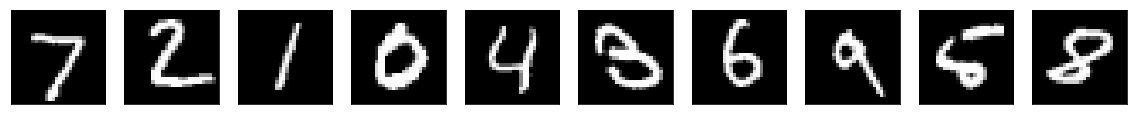

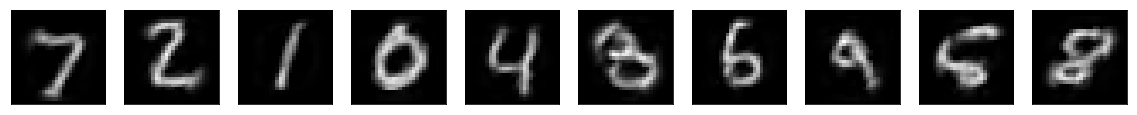

In [11]:
bastien_utils.plot_all_images(x_small)
bastien_utils.plot_all_images(x_small_rec_nmf)

In [5]:
np.mean(np.square(x_test_rec_nmf - x_test))

0.010891263864557126

In [6]:
x_test_rec_clipped = np.clip(x_test_rec_nmf, 0, 1)

In [7]:
np.mean(np.square(x_test_rec_clipped - x_test))

0.010468785742547148

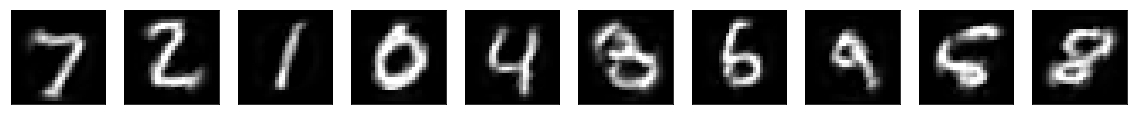

In [15]:
bastien_utils.plot_all_images(x_test_rec_clipped[idx_small])

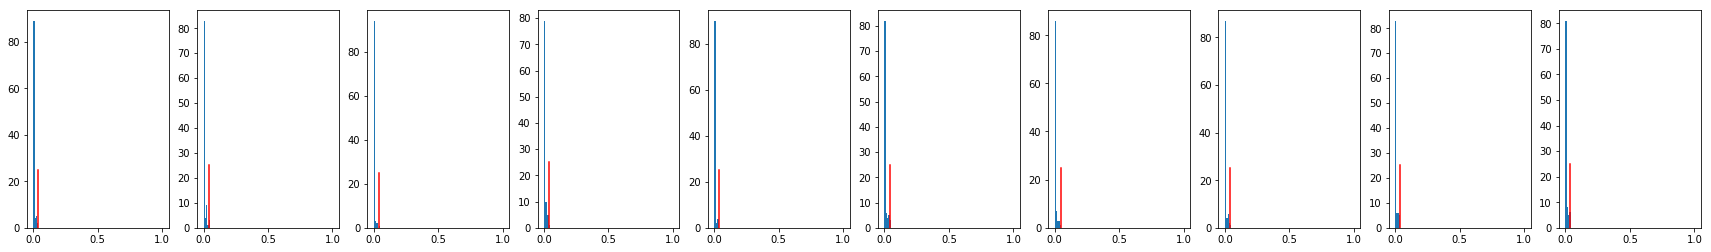

In [16]:
metrics.plot_histograms_of_the_encoding(H_small)

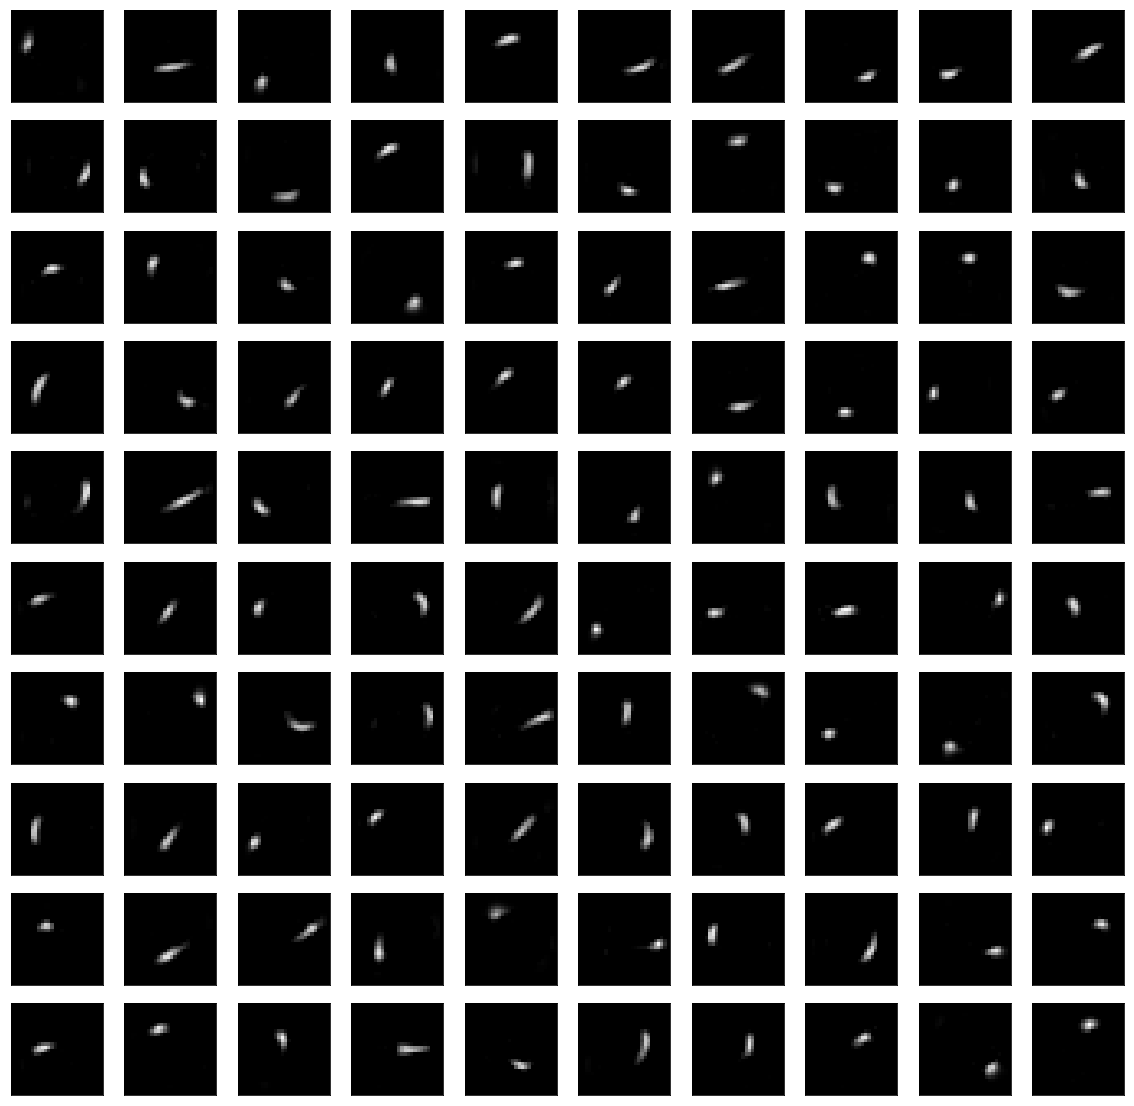

In [20]:
bastien_utils.plot_all_images(atoms[:100])

In [21]:
atoms_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1)

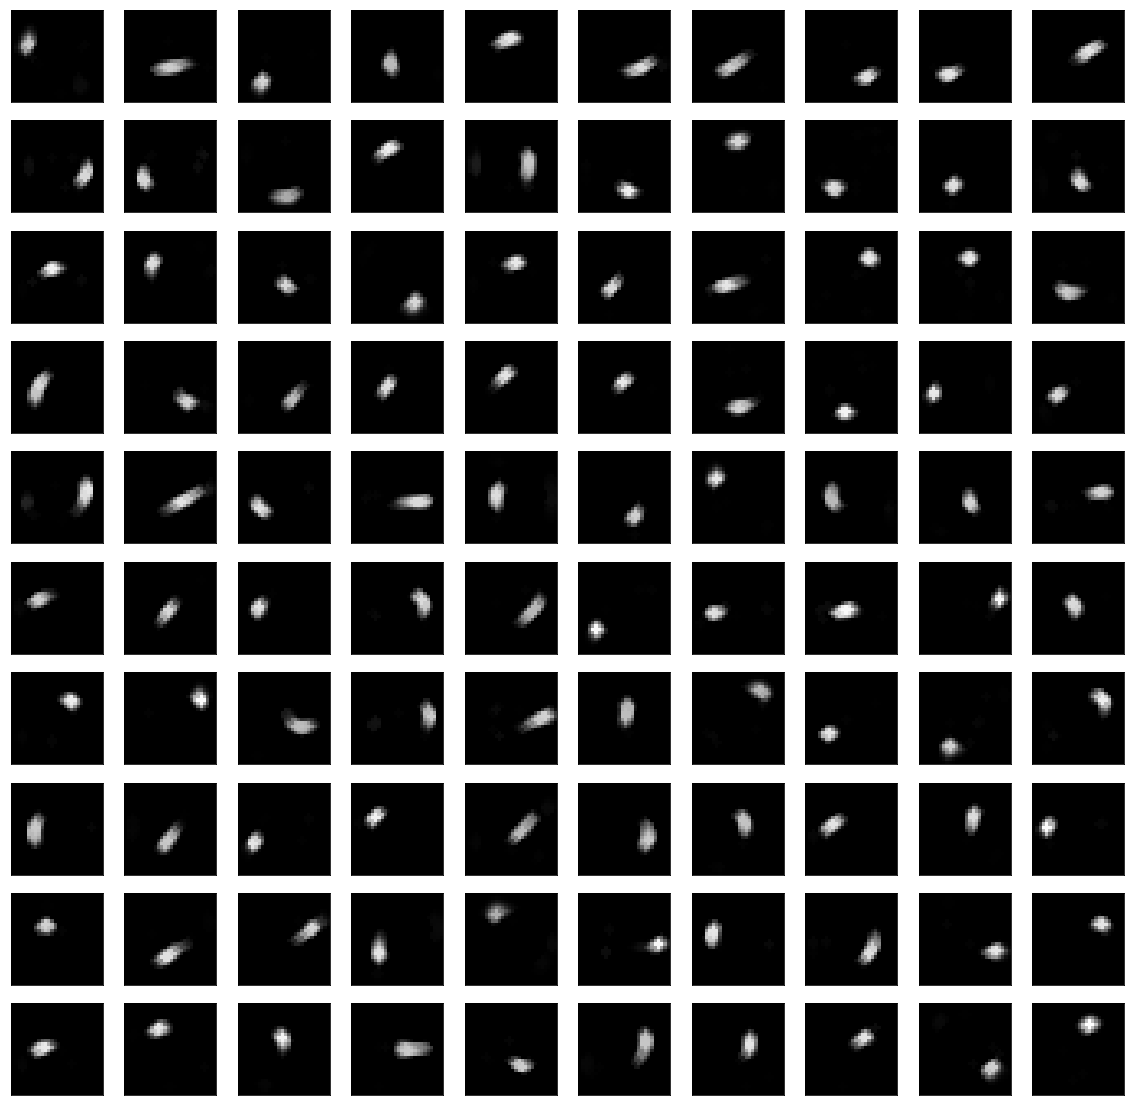

In [22]:
bastien_utils.plot_all_images(atoms_dil)

In [26]:
max_approx = metrics.max_approximation(atoms, H, morphoMaths.dilatation, SE_scale=1)
max_approx = np.swapaxes(max_approx, 1, 2)

In [27]:
max_approx_clipped = np.clip(max_approx, 0, 1)

In [29]:
x_test_dil = bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)

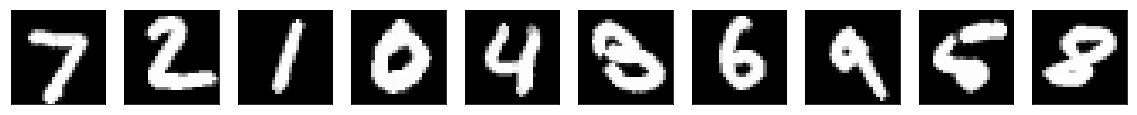

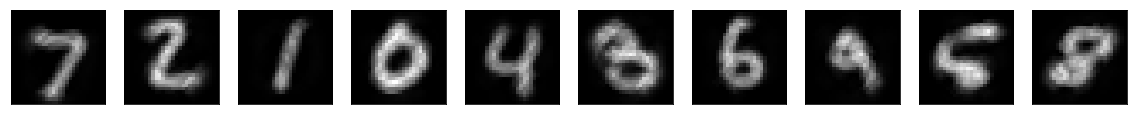

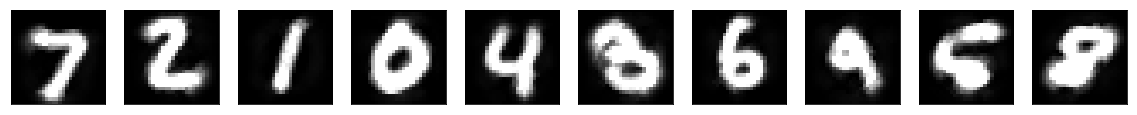

In [30]:
bastien_utils.plot_all_images(x_test_dil[idx_small])
bastien_utils.plot_all_images(max_approx[idx_small])
bastien_utils.plot_all_images(max_approx_clipped[idx_small])

In [31]:
np.mean(np.square(max_approx - x_test_dil))

0.05898104090629696

In [32]:
np.mean(np.square(max_approx_clipped - x_test_dil))

0.012045786007745021

In [33]:
print("Sparsity Measure of the encoding (Hoyer): ", metrics.sparsity_Hoyer(H))

Sparsity Measure of the encoding (Hoyer):  0.6626632485431274


In [34]:
print("KL divergence sparsity measure to 0.01: ", metrics.sparsity_KL_divergence(H))

KL divergence sparsity measure to 0.01:  0.3091770233031996


In [36]:
import atoms_analysis

Atoms associated with the 10 highest code coefficients of the image


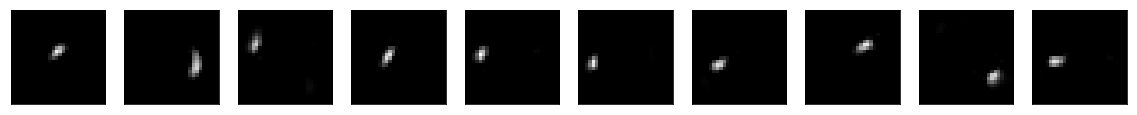

In [37]:
atoms_analysis.plot_10_most_used_atoms_for_an_image(H_small[1], atoms)

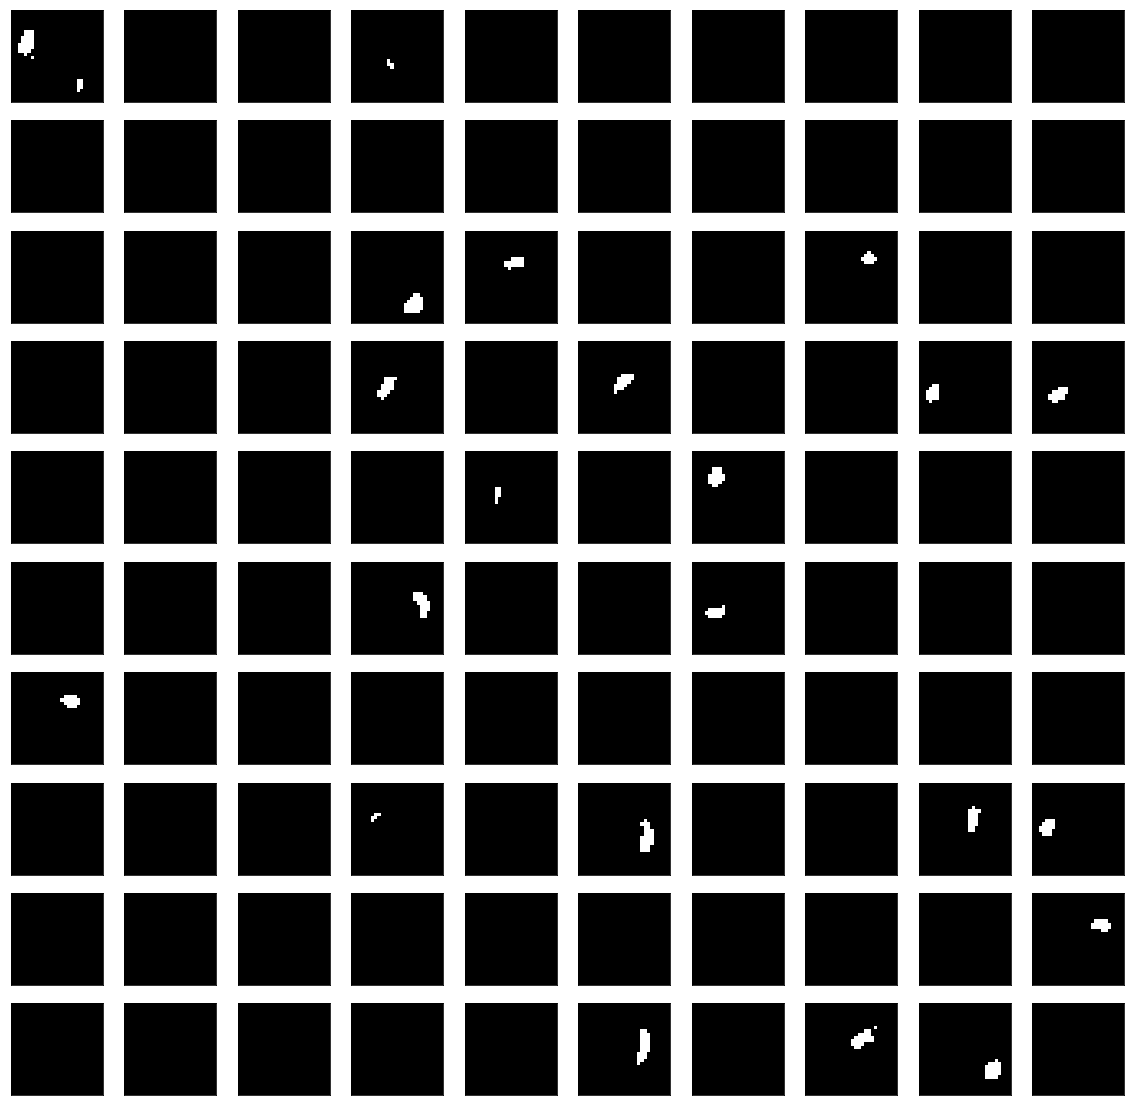

In [38]:
atoms_analysis.plot_binarized_weighted_atoms(atoms, H_small[1], nb_atoms_to_use_for_threshold_computation=100)

<Figure size 1728x432 with 0 Axes>

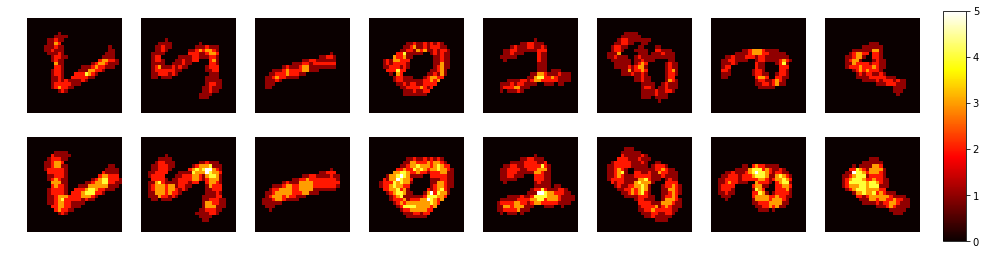

In [39]:
atoms_analysis.plot_heat_map_of_overlapping_atoms(H_small,atoms, dilated_atoms=atoms_dil, number_of_atoms=50, nb_atoms_to_use_for_threshold_computation=20)

# Interest of Max-Approximation

In [3]:
import time

In [42]:
dilation_times = np.zeros(100)
max_approximation_times = np.zeros(100)
for i in range(100):
    t1 = time.time()
    bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_test, SE_scale=1)
    t2=time.time()
    dilation_times[i] = t2 - t1
    
    t1 = time.time()
    metrics.reconstructions(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, atoms, SE_scale=1), H)
    t2 = time.time()
    max_approximation_times[i] = t2 - t1

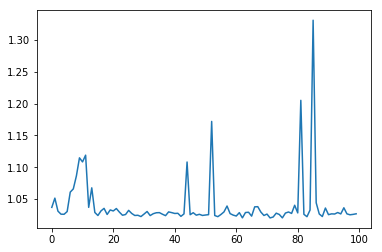

In [45]:
mean_dilation_times = np.mean(dilation_times)
plt.plot(np.arange(100), dilation_times)
plt.show()

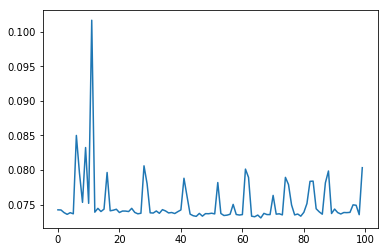

In [47]:
mean_max_approx_times = np.mean(max_approximation_times)
plt.plot(np.arange(100), max_approximation_times)
plt.show()

In [48]:
print("Time to compute dilation of all 10000 test images: ", mean_dilation_times)
print("Time to compute max_approximation to dilation of all 10000 test images: ", mean_max_approx_times)
print("Relative diffence: ", 100*(mean_dilation_times-mean_max_approx_times)/mean_dilation_times)

Time to compute dilation of all 10000 test images:  1.0395511412620544
Time to compute max_approximation to dilation of all 10000 test images:  0.07521935462951661
Relative diffence:  92.76424683270537


In [51]:
np.std(dilation_times)
np.std(max_approximation_times)

0.003530707198435845